Execution: 1, Best Solution: [3, 5, 0, 4, 1, 7, 2, 6], Fitness Score: 28


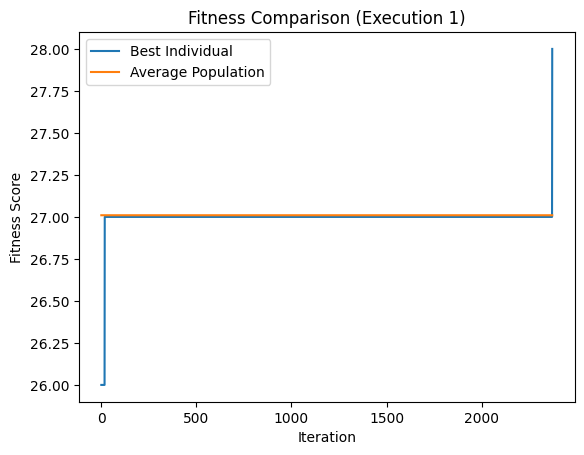

Execution: 2, Best Solution: [4, 7, 3, 0, 6, 1, 5, 2], Fitness Score: 28


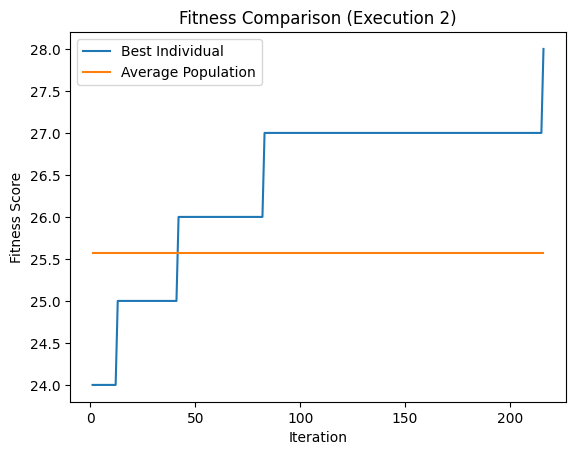

Execution: 3, Best Solution: [0, 5, 7, 2, 6, 3, 1, 4], Fitness Score: 28


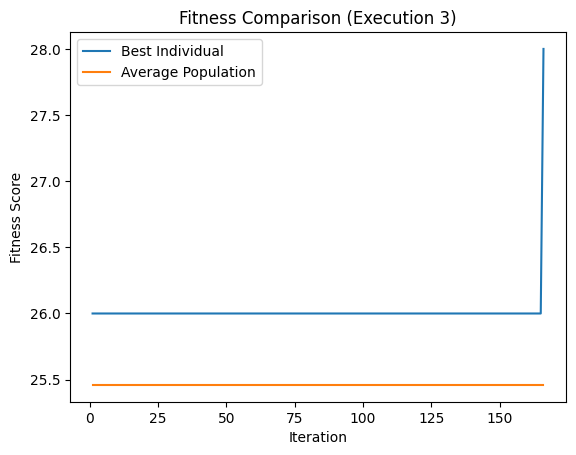

Execution: 4, Best Solution: [4, 1, 7, 5, 3, 6, 0, 3], Fitness Score: 27


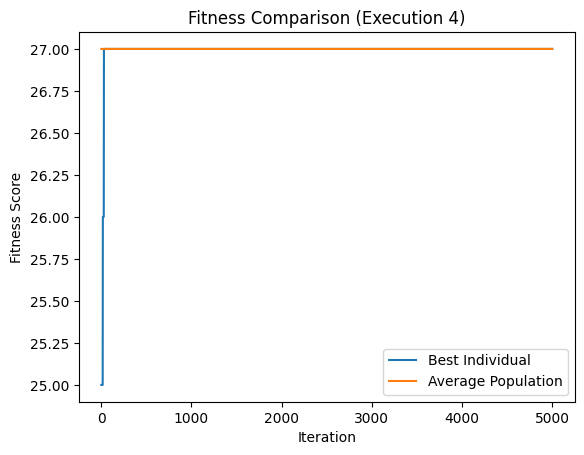

Execution: 5, Best Solution: [2, 0, 6, 4, 7, 1, 3, 5], Fitness Score: 28


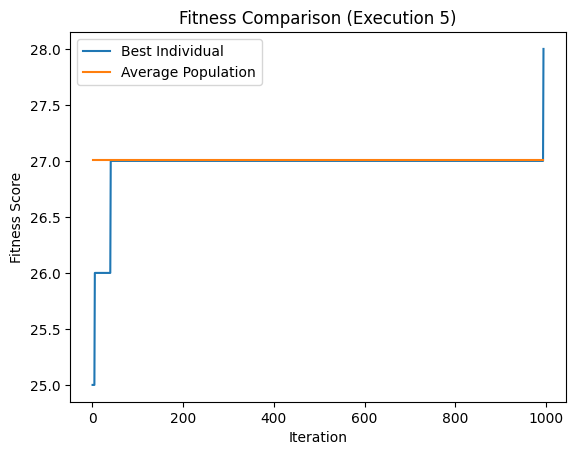

Execution: 6, Best Solution: [3, 5, 7, 2, 0, 6, 4, 1], Fitness Score: 28


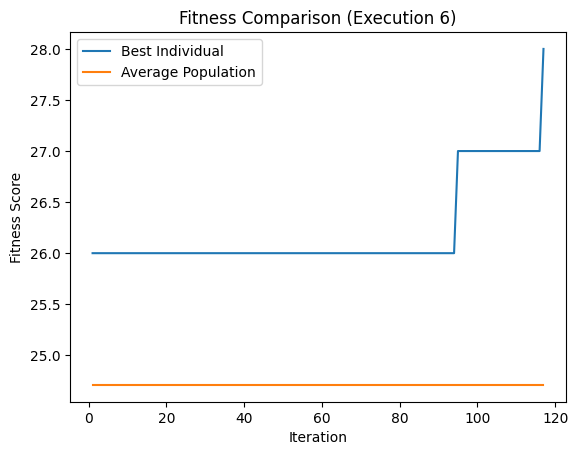

Execution: 7, Best Solution: [1, 3, 6, 0, 7, 4, 1, 5], Fitness Score: 27


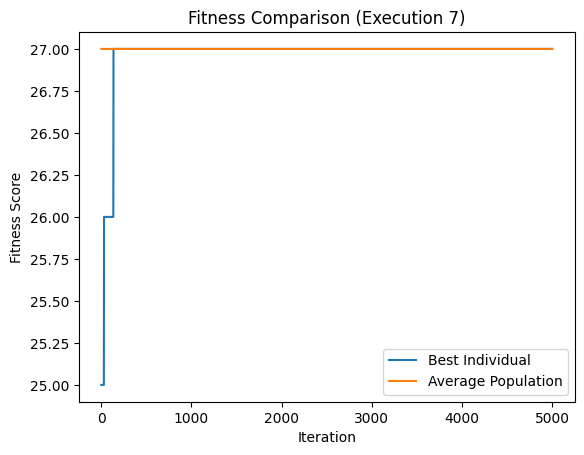

Execution: 8, Best Solution: [4, 0, 3, 5, 7, 1, 6, 2], Fitness Score: 28


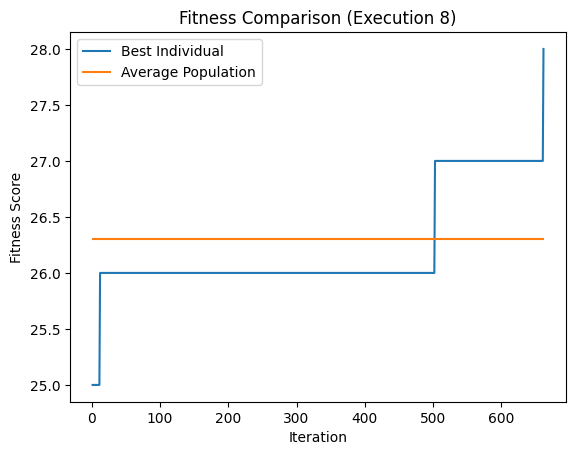

Execution: 9, Best Solution: [7, 7, 4, 1, 5, 0, 6, 3], Fitness Score: 27


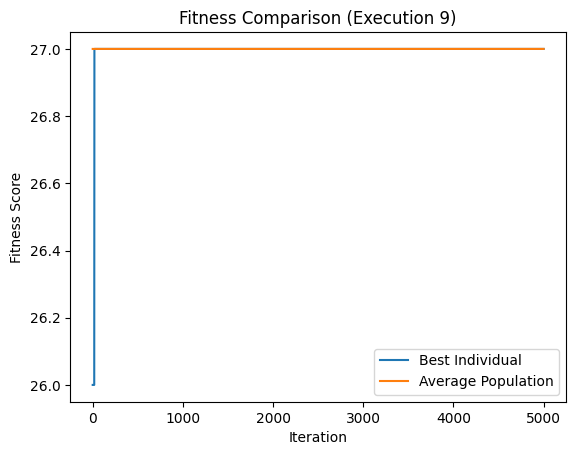

Execution: 10, Best Solution: [4, 2, 7, 6, 1, 3, 5, 0], Fitness Score: 27


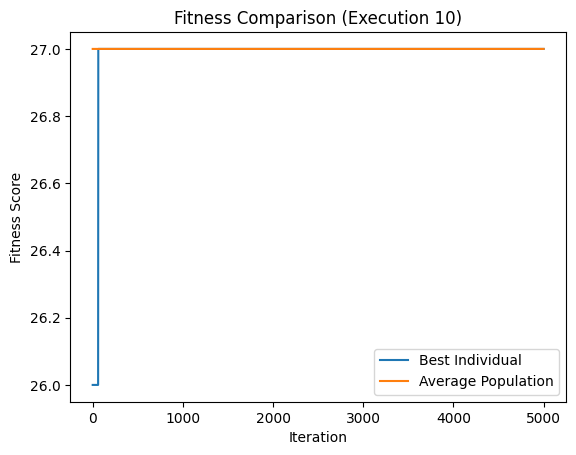

Execution: 11, Best Solution: [6, 1, 5, 2, 0, 3, 7, 4], Fitness Score: 28


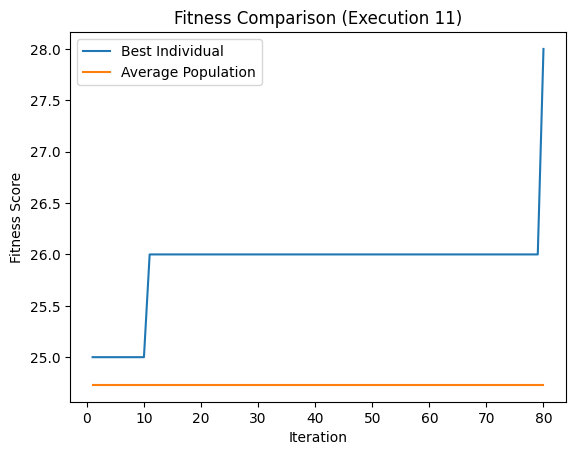

Execution: 12, Best Solution: [4, 6, 1, 3, 7, 0, 2, 5], Fitness Score: 28


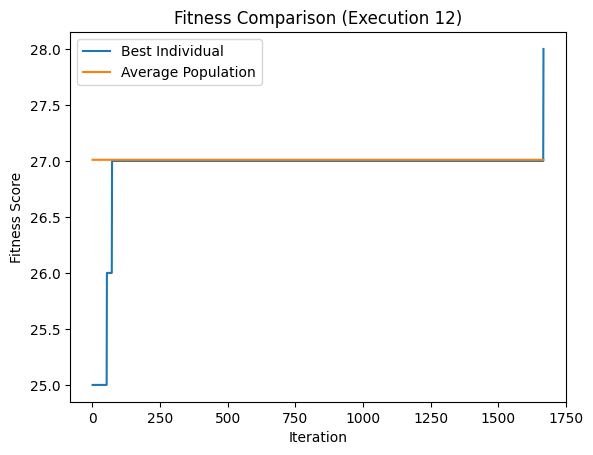

Execution: 13, Best Solution: [5, 2, 0, 7, 4, 1, 3, 6], Fitness Score: 28


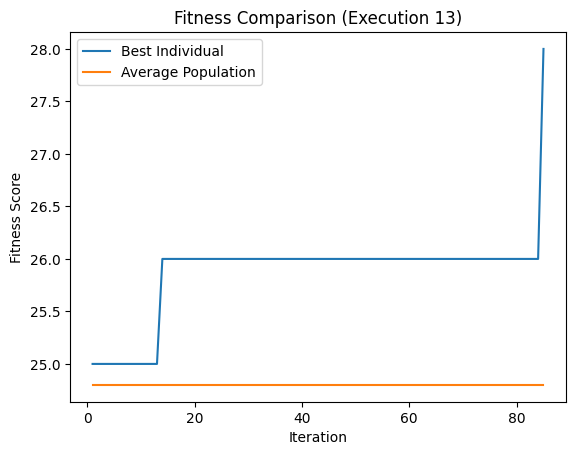

Execution: 14, Best Solution: [6, 1, 5, 2, 0, 3, 7, 4], Fitness Score: 28


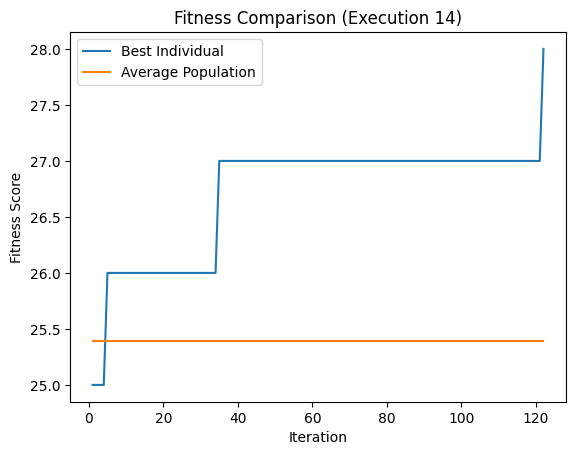

Execution: 15, Best Solution: [5, 0, 6, 3, 1, 7, 4, 2], Fitness Score: 27


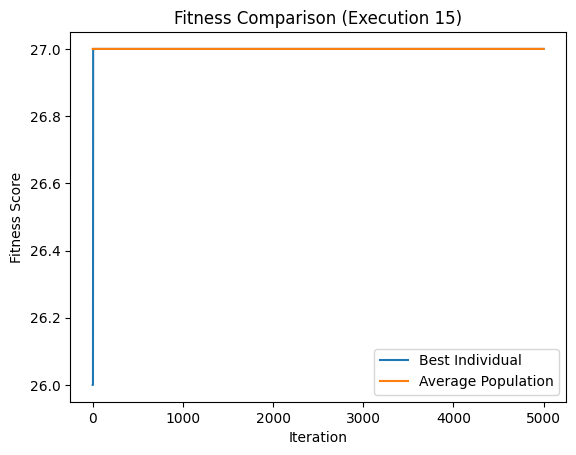

Execution: 16, Best Solution: [6, 0, 2, 7, 5, 3, 1, 4], Fitness Score: 28


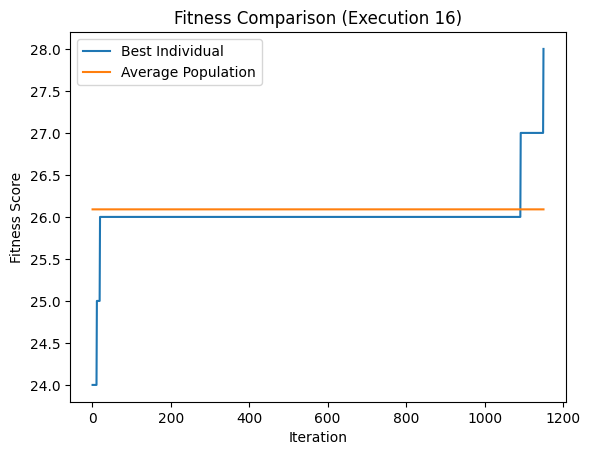

Execution: 17, Best Solution: [2, 4, 6, 1, 5, 7, 0, 3], Fitness Score: 27


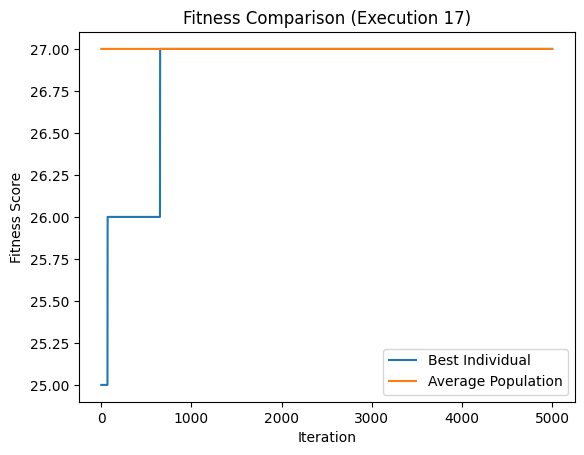

Execution: 18, Best Solution: [6, 2, 5, 7, 4, 0, 3, 5], Fitness Score: 27


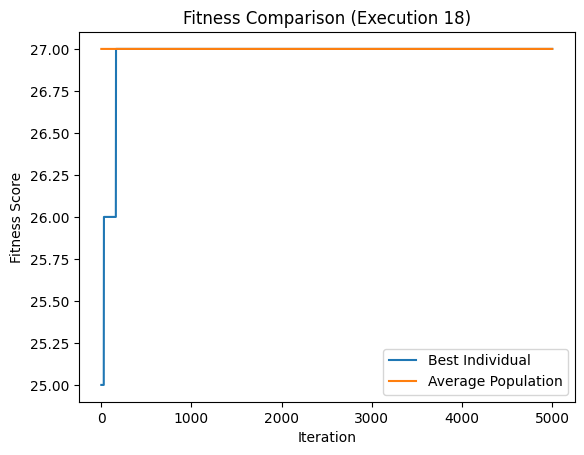

Execution: 19, Best Solution: [3, 7, 0, 4, 6, 1, 5, 2], Fitness Score: 28


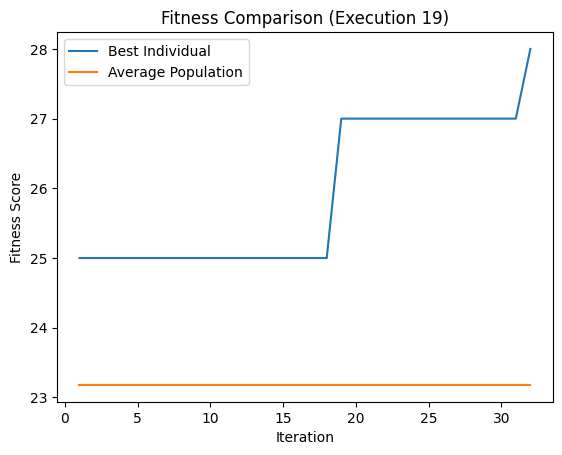

Execution: 20, Best Solution: [5, 1, 6, 0, 2, 4, 7, 3], Fitness Score: 28


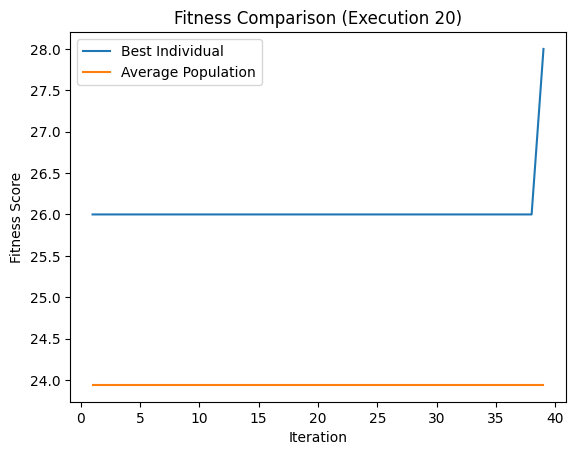

Execution: 21, Best Solution: [2, 4, 7, 3, 0, 6, 1, 5], Fitness Score: 28


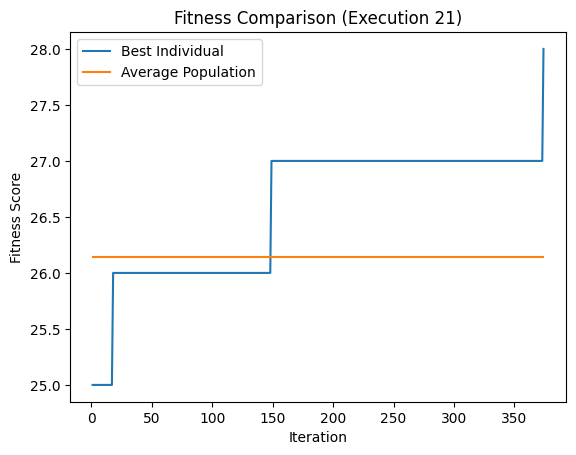

Execution: 22, Best Solution: [0, 4, 0, 5, 3, 1, 7, 2], Fitness Score: 27


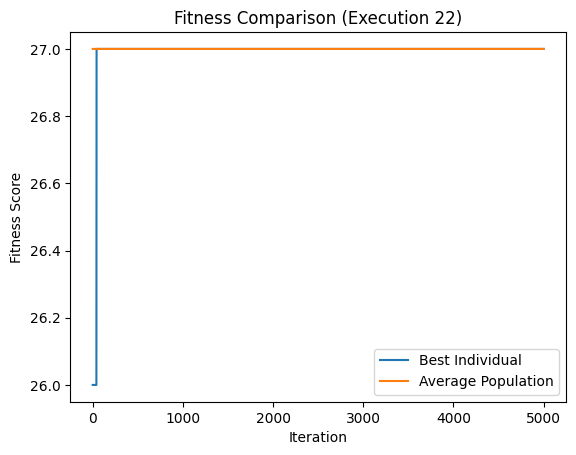

Execution: 23, Best Solution: [6, 2, 5, 3, 0, 7, 4, 1], Fitness Score: 27


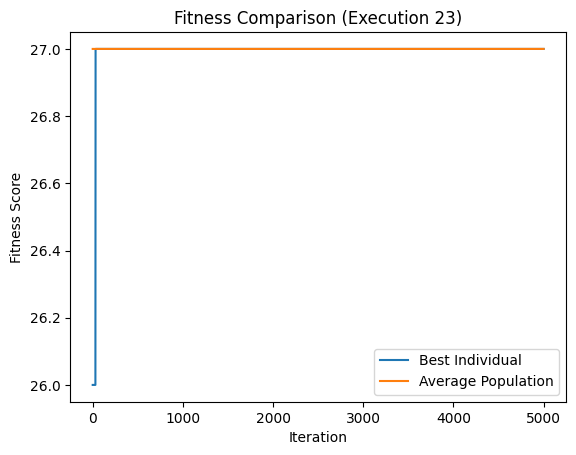

Execution: 24, Best Solution: [1, 7, 5, 0, 2, 4, 6, 3], Fitness Score: 28


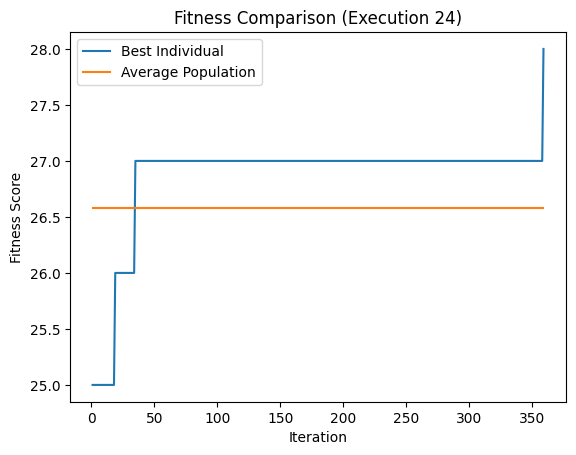

Execution: 25, Best Solution: [5, 2, 6, 1, 3, 7, 0, 4], Fitness Score: 28


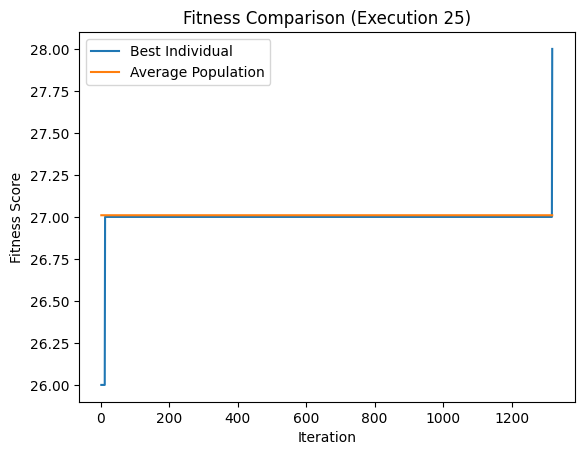

Execution: 26, Best Solution: [5, 1, 6, 0, 2, 4, 7, 3], Fitness Score: 28


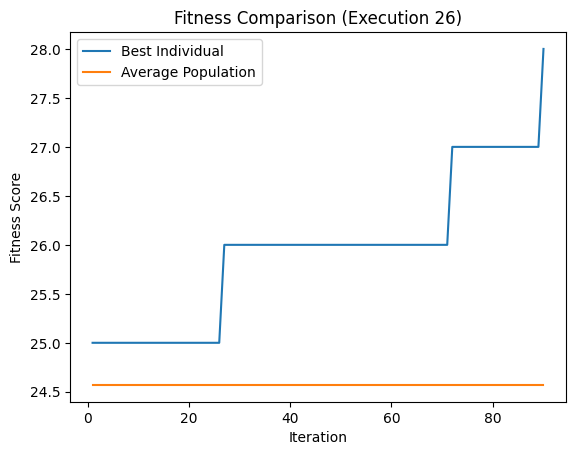

Execution: 27, Best Solution: [6, 4, 2, 0, 5, 7, 1, 3], Fitness Score: 28


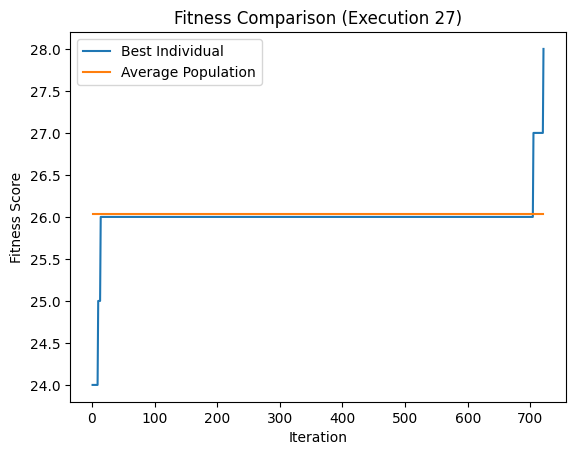

Execution: 28, Best Solution: [3, 0, 4, 7, 1, 6, 2, 5], Fitness Score: 28


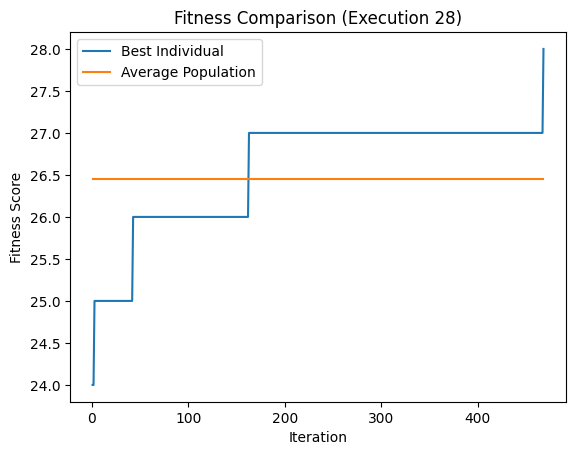

Execution: 29, Best Solution: [5, 2, 0, 3, 6, 4, 1, 4], Fitness Score: 27


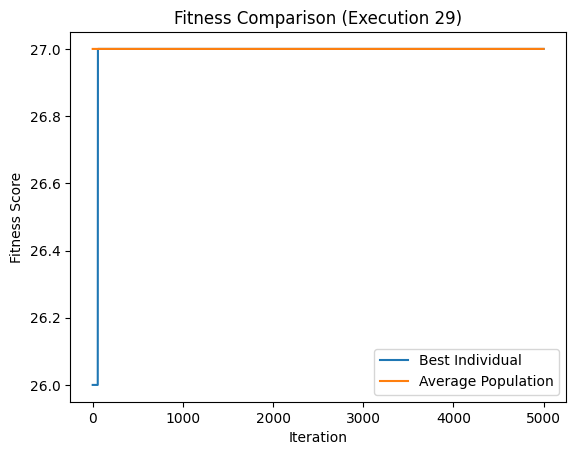

Execution: 30, Best Solution: [1, 3, 7, 2, 4, 2, 0, 5], Fitness Score: 27


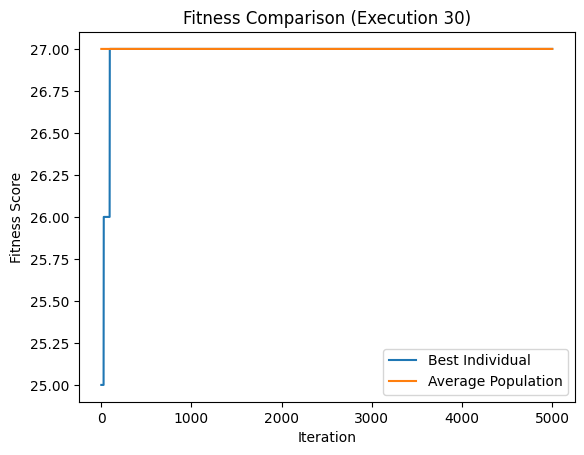

Convergence Analysis:
  - Converged Executions: 19/30 (63.33%)
  - Average Convergence Iteration: 367.70
  - Standard Deviation of Convergence Iteration: 576.28
  - Average Number of Converged Individuals: 0.63
Fitness Analysis:
  - Average Fitness Scores: 27.63
  - Standard Deviation of Fitness Scores: 0.48


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

POPULATION_SIZE = 100
NUM_CHILDREN = 2
NUM_QUEENS = 8
MAX_EVALUATIONS = 10000
NUM_EXECUTIONS = 30

def initialize_population():
    population = []
    for _ in range(POPULATION_SIZE):
        individual = [random.randint(0, NUM_QUEENS-1) for _ in range(NUM_QUEENS)]
        population.append(individual)
    return population

def fitness_score(individual):
    score = 0
    for i in range(NUM_QUEENS):
        for j in range(i + 1, NUM_QUEENS):
            if individual[i] == individual[j] or abs(individual[i] - individual[j]) == abs(i - j):
                score += 1
    return (NUM_QUEENS * (NUM_QUEENS - 1)) // 2 - score

def selection(population):
    sorted_population = sorted(population, key=lambda ind: fitness_score(ind), reverse=True)
    return sorted_population[:2]

def crossover(parent1, parent2):
    child1 = parent1.copy()
    child2 = parent2.copy()
    if random.random() < 0.9:
        cut = random.randint(1, NUM_QUEENS - 1)
        child1[cut:], child2[cut:] = child2[cut:], child1[cut:]
    return child1, child2

def mutation(individual):
    mutated_individual = individual.copy()
    for i in range(NUM_QUEENS):
        if random.random() < 0.4:
            mutated_individual[i] = random.randint(0, NUM_QUEENS-1)
    return mutated_individual

def evaluate_population(population):
    evaluations = 0
    for individual in population:
        score = fitness_score(individual)
        evaluations += 1
        if score == (NUM_QUEENS * (NUM_QUEENS - 1)) // 2:
            return True, evaluations
        if evaluations >= MAX_EVALUATIONS:
            return False, evaluations
    return False, evaluations

def genetic_algorithm():
    best_scores = []
    convergence_iteration = []
    num_converged_individuals = []
    fitness_scores = []
    converged_executions = 0
    convergence_iterations_per_execution = []
    avg_population_fitness_per_execution = []

    for execution_number in range(1, NUM_EXECUTIONS + 1):
        population = initialize_population()
        evaluations = 0
        generation = 1
        converged = False
        converged_iteration = 0
        converged_individuals = 0
        best_fitness = 0
        iteration_fitness = []
        best_individual_fitness_per_iteration = []

        while True:
            parents = selection(population)
            children = []
            for _ in range(NUM_CHILDREN):
                child1, child2 = crossover(parents[0], parents[1])
                child1 = mutation(child1)
                child2 = mutation(child2)
                children.extend([child1, child2])
            population.extend(children)
            population = sorted(population, key=lambda ind: fitness_score(ind), reverse=True)[:POPULATION_SIZE]
            evaluations += NUM_CHILDREN

            if not converged:
                best_fitness = fitness_score(population[0])
                iteration_fitness.append(best_fitness)
                best_individual_fitness_per_iteration.append(best_fitness)
                if best_fitness == (NUM_QUEENS * (NUM_QUEENS - 1)) // 2:
                    converged = True
                    converged_iteration = generation
                    converged_individuals = sum([1 for ind in population if fitness_score(ind) == best_fitness])

            if converged or evaluations >= MAX_EVALUATIONS:
                break

            generation += 1

        best_scores.append(best_fitness)
        convergence_iteration.append(converged_iteration)
        num_converged_individuals.append(converged_individuals)
        fitness_scores.append(iteration_fitness)
        convergence_iterations_per_execution.append(converged_iteration)  # Armazena o número de iterações de convergência

        population_fitness = [fitness_score(individual) for individual in population]
        avg_population_fitness = np.mean(population_fitness)
        avg_population_fitness_per_execution.append(avg_population_fitness)  # Armazena o fitness médio da população

        best_individual = population[0]
        best_individual_fitness = fitness_score(best_individual)

        # Exibir a melhor solução e seu fitness score
        print("Execution: {}, Best Solution: {}, Fitness Score: {}".format(execution_number, best_individual, best_individual_fitness))

        if converged:
            converged_executions += 1
            # Plotting the best individual fitness per iteration for the current execution
            iterations = range(1, len(best_individual_fitness_per_iteration) + 1)
            plt.plot(iterations, best_individual_fitness_per_iteration, label='Best Individual')
            plt.plot(iterations, [avg_population_fitness] * len(iterations), label='Average Population')
            plt.xlabel('Iteration')
            plt.ylabel('Fitness Score')
            plt.title('Fitness Comparison (Execution {})'.format(execution_number))
            plt.legend()
            plt.show()
            continue

        # Plotting the best individual fitness per iteration for the current execution
        iterations = range(1, len(best_individual_fitness_per_iteration) + 1)
        plt.plot(iterations, best_individual_fitness_per_iteration, label='Best Individual')
        plt.plot(iterations, [avg_population_fitness] * len(iterations), label='Average Population')
        plt.xlabel('Iteration')
        plt.ylabel('Fitness Score')
        plt.title('Fitness Comparison (Execution {})'.format(execution_number))
        plt.legend()
        plt.show()

    # Analysis of convergence metrics
    convergence_percentage = converged_executions / NUM_EXECUTIONS * 100
    avg_convergence_iteration = np.mean(convergence_iteration)
    std_convergence_iteration = np.std(convergence_iteration)
    avg_num_converged_individuals = np.mean(num_converged_individuals)
    avg_fitness_scores = np.mean(best_scores)
    std_fitness_scores = np.std(best_scores)

    print("Convergence Analysis:")
    print("  - Converged Executions: {}/{} ({:.2f}%)".format(converged_executions, NUM_EXECUTIONS, convergence_percentage))
    print("  - Average Convergence Iteration: {:.2f}".format(avg_convergence_iteration))
    print("  - Standard Deviation of Convergence Iteration: {:.2f}".format(std_convergence_iteration))
    print("  - Average Number of Converged Individuals: {:.2f}".format(avg_num_converged_individuals))
    print("Fitness Analysis:")
    print("  - Average Fitness Scores: {:.2f}".format(avg_fitness_scores))
    print("  - Standard Deviation of Fitness Scores: {:.2f}".format(std_fitness_scores))

genetic_algorithm()


Execution: 1, Best Solution: [3, 7, 0, 4, 6, 1, 5, 2], Fitness Score: 28


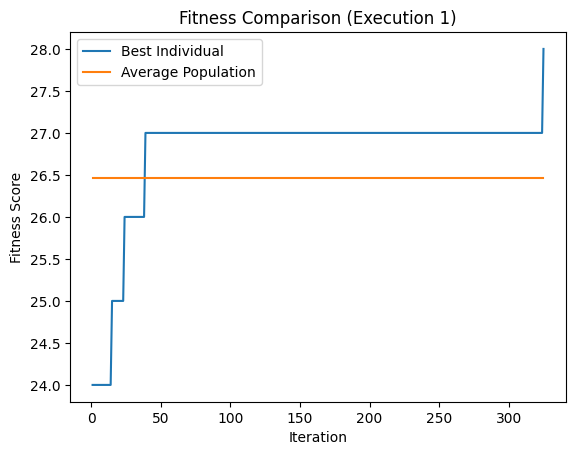

Execution: 2, Best Solution: [3, 5, 7, 1, 6, 0, 2, 4], Fitness Score: 28


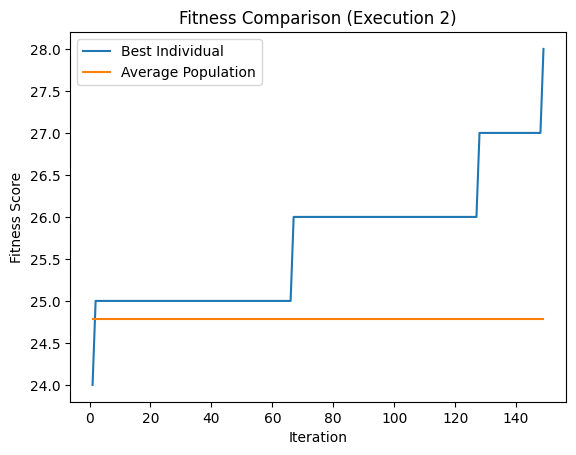

Execution: 3, Best Solution: [3, 1, 4, 7, 5, 0, 2, 6], Fitness Score: 28


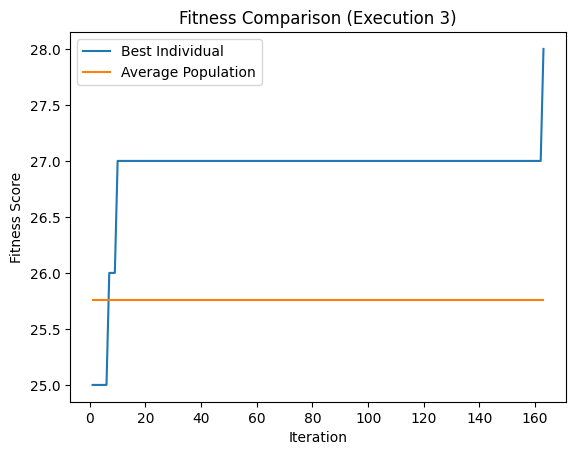

Execution: 4, Best Solution: [2, 5, 3, 1, 7, 4, 6, 0], Fitness Score: 28


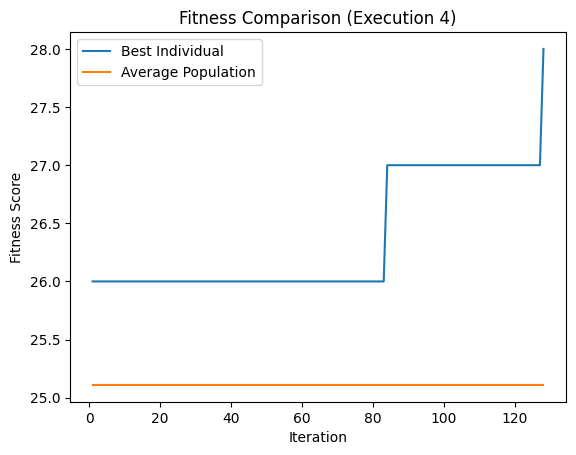

Execution: 5, Best Solution: [2, 6, 1, 7, 5, 3, 0, 4], Fitness Score: 28


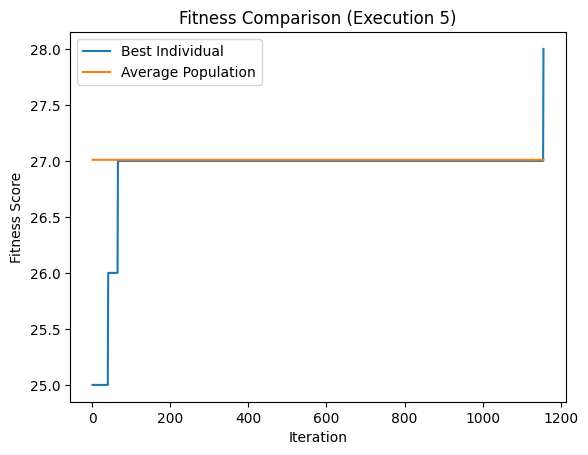

Execution: 6, Best Solution: [2, 6, 3, 1, 7, 5, 0, 4], Fitness Score: 27
Execution: 7, Best Solution: [4, 1, 5, 0, 6, 3, 7, 2], Fitness Score: 28


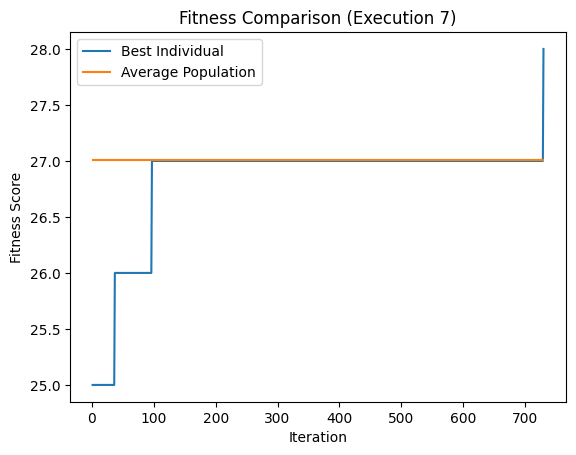

Execution: 8, Best Solution: [5, 2, 0, 6, 3, 7, 4, 1], Fitness Score: 27
Execution: 9, Best Solution: [5, 2, 4, 7, 0, 3, 1, 6], Fitness Score: 28


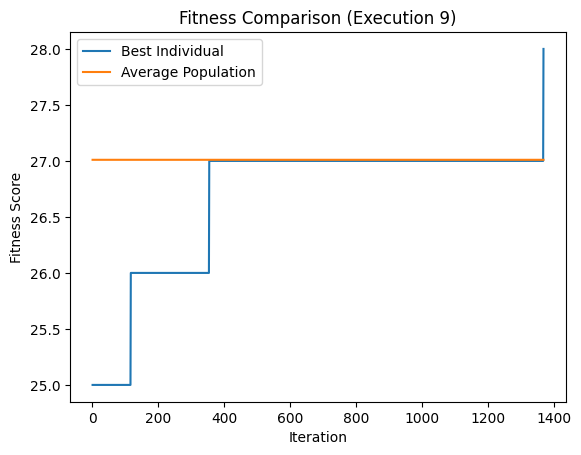

Execution: 10, Best Solution: [0, 5, 3, 1, 6, 4, 2, 0], Fitness Score: 27
Execution: 11, Best Solution: [4, 1, 5, 0, 6, 3, 7, 2], Fitness Score: 28


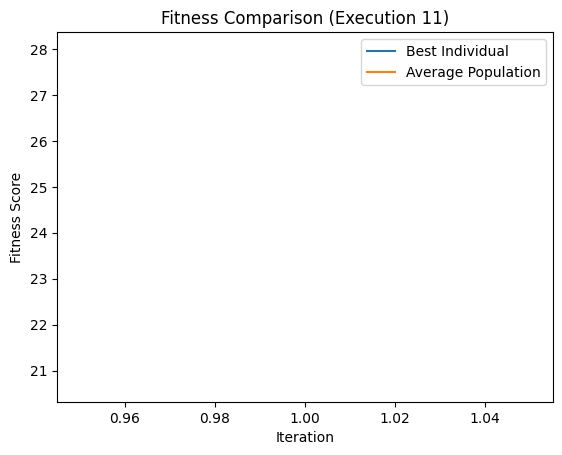

Execution: 12, Best Solution: [6, 3, 1, 7, 5, 0, 2, 4], Fitness Score: 28


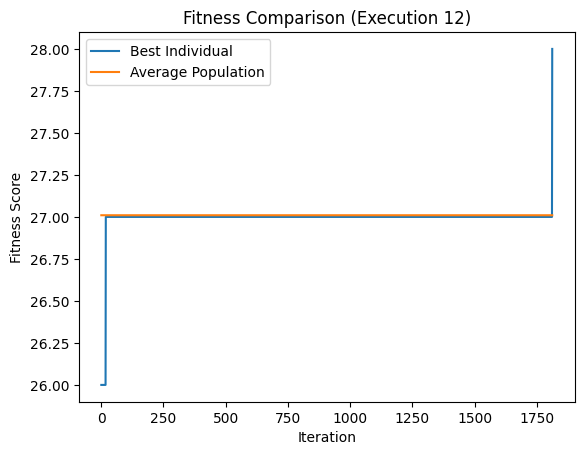

Execution: 13, Best Solution: [3, 7, 2, 4, 1, 7, 0, 6], Fitness Score: 27
Execution: 14, Best Solution: [3, 1, 6, 2, 5, 7, 4, 0], Fitness Score: 28


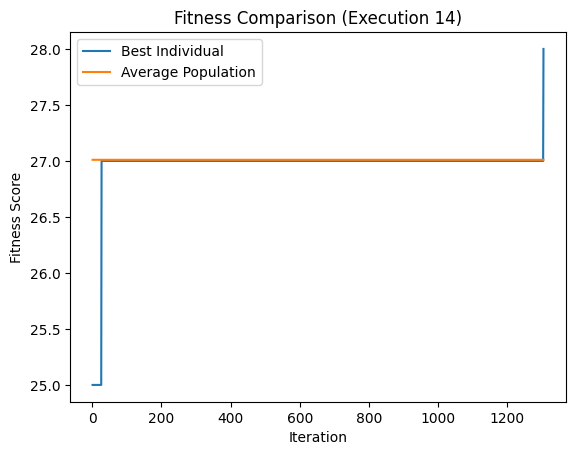

Execution: 15, Best Solution: [4, 6, 0, 2, 7, 5, 3, 1], Fitness Score: 28


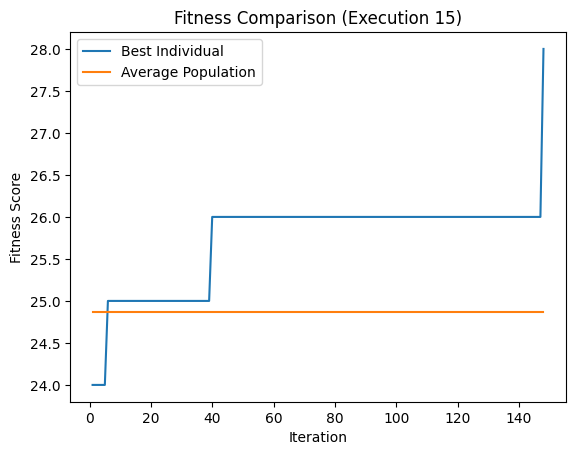

Execution: 16, Best Solution: [7, 0, 3, 6, 2, 5, 1, 4], Fitness Score: 27
Execution: 17, Best Solution: [4, 6, 3, 0, 2, 7, 5, 1], Fitness Score: 28


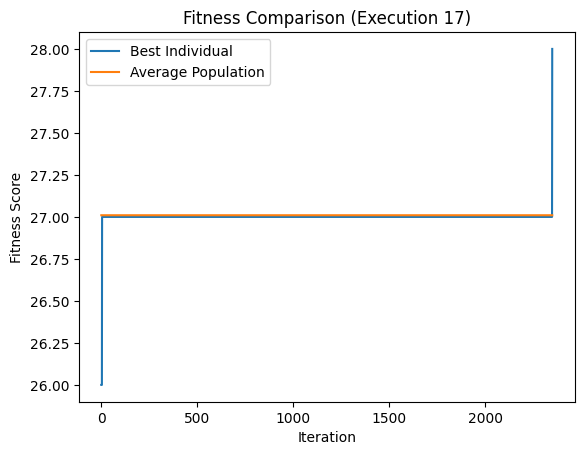

Execution: 18, Best Solution: [3, 7, 0, 2, 5, 1, 6, 4], Fitness Score: 28


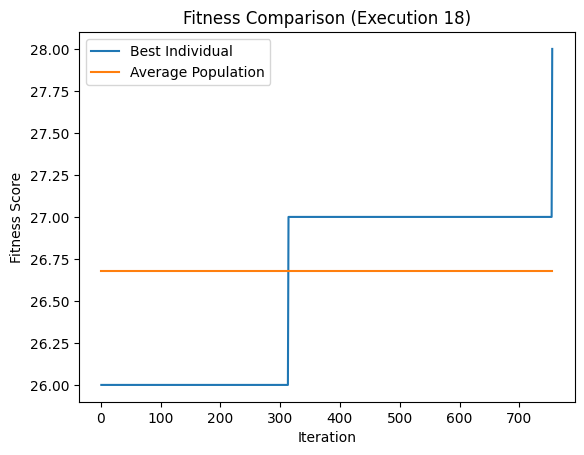

Execution: 19, Best Solution: [5, 2, 6, 1, 3, 7, 0, 4], Fitness Score: 28


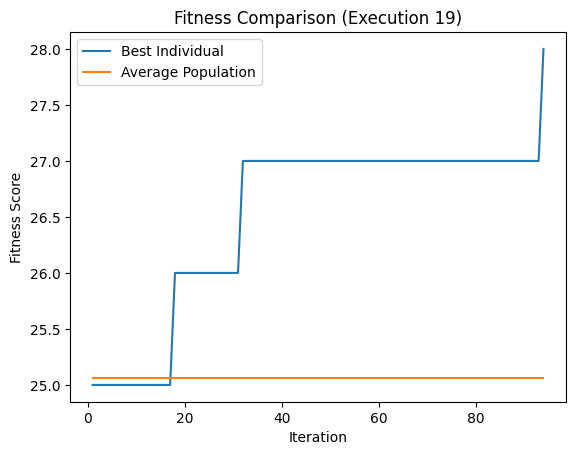

Execution: 20, Best Solution: [1, 5, 0, 6, 3, 7, 2, 4], Fitness Score: 28


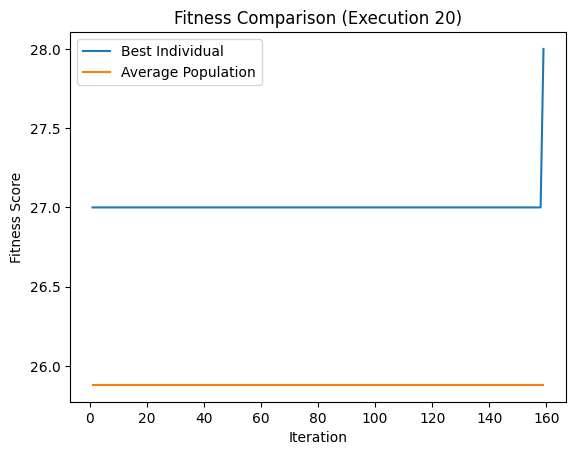

Execution: 21, Best Solution: [4, 6, 0, 3, 1, 7, 5, 2], Fitness Score: 28


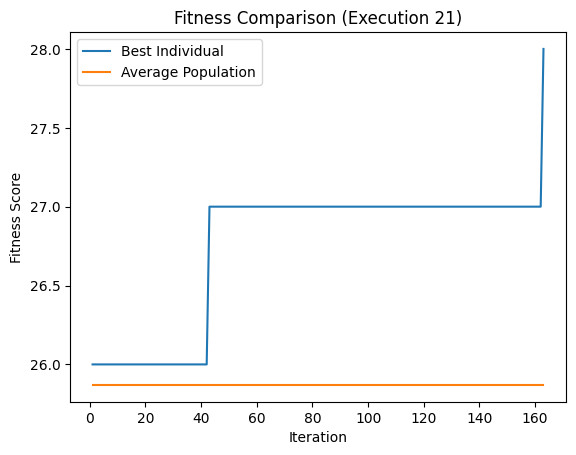

Execution: 22, Best Solution: [4, 6, 1, 5, 2, 0, 3, 7], Fitness Score: 28


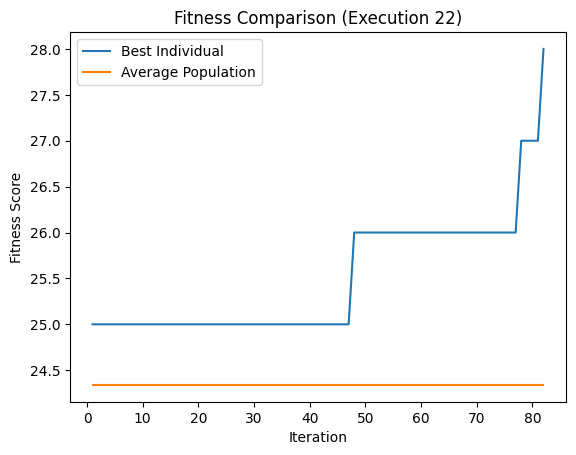

Execution: 23, Best Solution: [0, 4, 7, 5, 2, 6, 1, 3], Fitness Score: 28


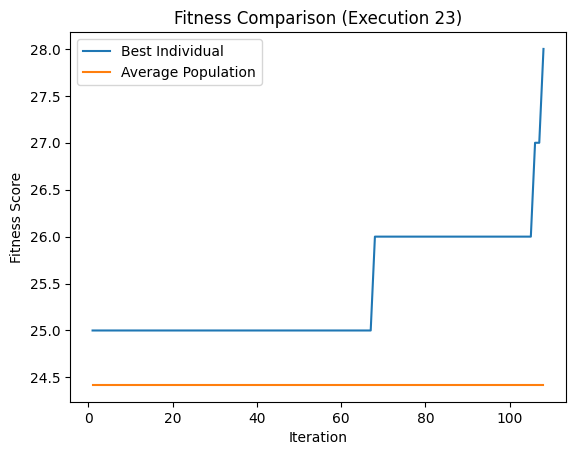

Execution: 24, Best Solution: [6, 3, 1, 4, 7, 0, 2, 5], Fitness Score: 28


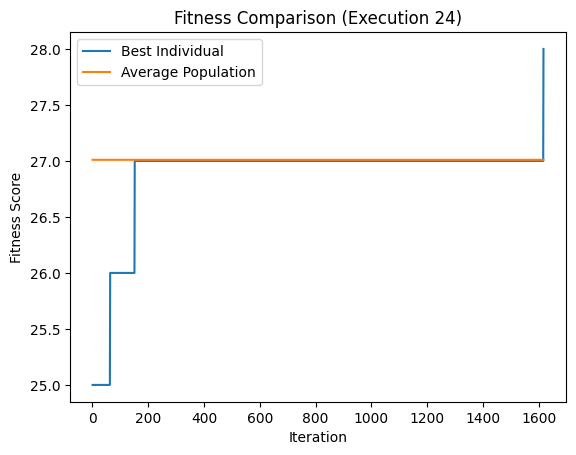

Execution: 25, Best Solution: [5, 2, 6, 1, 7, 4, 0, 3], Fitness Score: 28


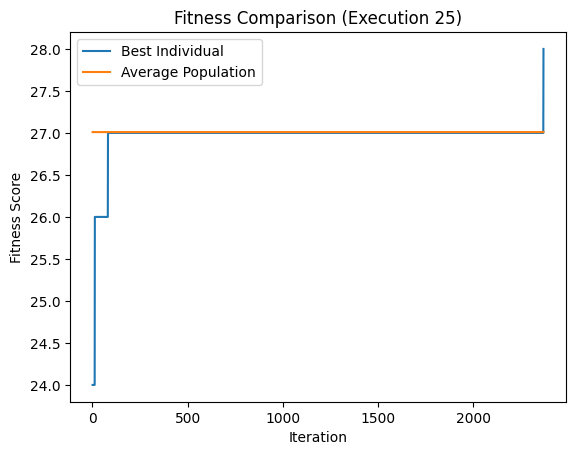

Execution: 26, Best Solution: [5, 2, 4, 1, 7, 4, 6, 0], Fitness Score: 27
Execution: 27, Best Solution: [4, 6, 1, 5, 2, 0, 7, 3], Fitness Score: 28


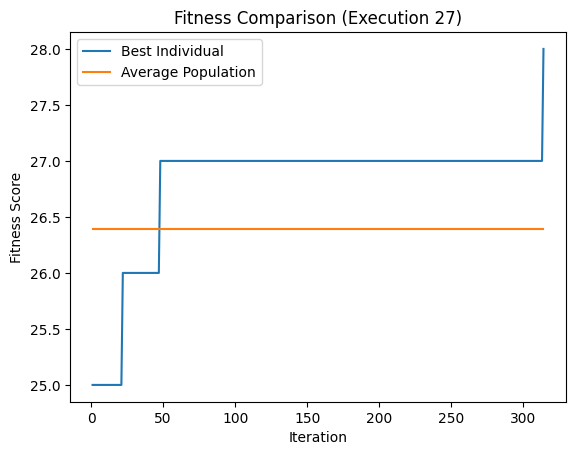

Execution: 28, Best Solution: [2, 4, 7, 1, 3, 6, 0, 5], Fitness Score: 27
Execution: 29, Best Solution: [4, 0, 7, 3, 6, 2, 1, 5], Fitness Score: 27
Execution: 30, Best Solution: [7, 3, 0, 2, 5, 1, 6, 4], Fitness Score: 28


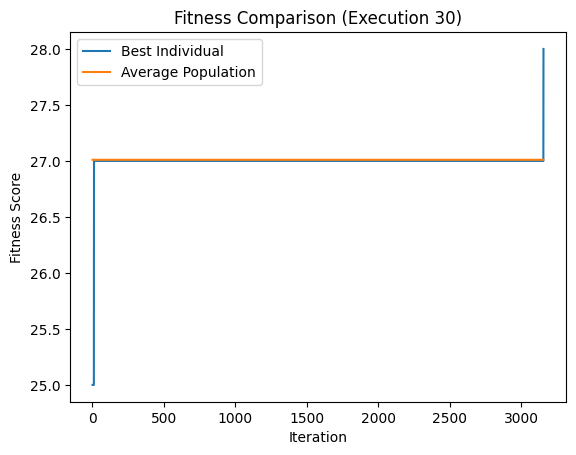

Average Convergence Iterations per Execution: 614.87
Convergence Analysis:
  - Converged Executions: 22/30 (73.33%)
  - Average Convergence Iteration: 614.87
  - Standard Deviation of Convergence Iteration: 856.48
  - Average Number of Converged Individuals: 0.73
Fitness Analysis:
  - Average Fitness Scores: 27.73
  - Standard Deviation of Fitness Scores: 0.44


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

POPULATION_SIZE = 100
NUM_CHILDREN = 2
NUM_QUEENS = 8
MAX_EVALUATIONS = 10000
NUM_EXECUTIONS = 30

def initialize_population():
    population = []
    for _ in range(POPULATION_SIZE):
        individual = [random.randint(0, NUM_QUEENS-1) for _ in range(NUM_QUEENS)]
        population.append(individual)
    return population

def fitness_score(individual):
    score = 0
    for i in range(NUM_QUEENS):
        for j in range(i + 1, NUM_QUEENS):
            if individual[i] == individual[j] or abs(individual[i] - individual[j]) == abs(i - j):
                score += 1
    return (NUM_QUEENS * (NUM_QUEENS - 1)) // 2 - score

def selection(population):
    sorted_population = sorted(population, key=lambda ind: fitness_score(ind), reverse=True)
    return sorted_population[:2]

def crossover(parent1, parent2):
    child1 = parent1.copy()
    child2 = parent2.copy()
    if random.random() < 0.9:
        cut = random.randint(1, NUM_QUEENS - 1)
        child1[cut:], child2[cut:] = child2[cut:], child1[cut:]
    return child1, child2

def mutation(individual):
    mutated_individual = individual.copy()
    for i in range(NUM_QUEENS):
        if random.random() < 0.4:
            mutated_individual[i] = random.randint(0, NUM_QUEENS-1)
    return mutated_individual

def evaluate_population(population):
    evaluations = 0
    for individual in population:
        score = fitness_score(individual)
        evaluations += 1
        if score == (NUM_QUEENS * (NUM_QUEENS - 1)) // 2:
            return True, evaluations
        if evaluations >= MAX_EVALUATIONS:
            return False, evaluations
    return False, evaluations

def genetic_algorithm():
    best_scores = []
    convergence_iteration = []
    num_converged_individuals = []
    fitness_scores = []
    converged_executions = 0
    convergence_iterations_per_execution = []
    avg_population_fitness_per_execution = []

    for execution_number in range(1, NUM_EXECUTIONS + 1):
        population = initialize_population()
        evaluations = 0
        generation = 1
        converged = False
        converged_iteration = 0
        converged_individuals = 0
        best_fitness = 0
        iteration_fitness = []
        best_individual_fitness_per_iteration = []

        while True:
            parents = selection(population)
            children = []
            for _ in range(NUM_CHILDREN):
                child1, child2 = crossover(parents[0], parents[1])
                child1 = mutation(child1)
                child2 = mutation(child2)
                children.extend([child1, child2])
            population.extend(children)
            population = sorted(population, key=lambda ind: fitness_score(ind), reverse=True)[:POPULATION_SIZE]
            evaluations += NUM_CHILDREN

            if not converged:
                best_fitness = fitness_score(population[0])
                iteration_fitness.append(best_fitness)
                best_individual_fitness_per_iteration.append(best_fitness)
                if best_fitness == (NUM_QUEENS * (NUM_QUEENS - 1)) // 2:
                    converged = True
                    converged_iteration = generation
                    converged_individuals = sum([1 for ind in population if fitness_score(ind) == best_fitness])

            if converged or evaluations >= MAX_EVALUATIONS:
                break

            generation += 1

        best_scores.append(best_fitness)
        convergence_iteration.append(converged_iteration)
        num_converged_individuals.append(converged_individuals)
        fitness_scores.append(iteration_fitness)
        convergence_iterations_per_execution.append(converged_iteration)  # Armazena o número de iterações de convergência

        population_fitness = [fitness_score(individual) for individual in population]
        avg_population_fitness = np.mean(population_fitness)
        avg_population_fitness_per_execution.append(avg_population_fitness)  # Armazena o fitness médio da população

        best_individual = population[0]
        best_individual_fitness = fitness_score(best_individual)

        # Exibir a melhor solução e seu fitness score
        print("Execution: {}, Best Solution: {}, Fitness Score: {}".format(execution_number, best_individual, best_individual_fitness))

        if converged:
            converged_executions += 1
            # Plotting the best individual fitness per iteration for the current execution
            iterations = range(1, len(best_individual_fitness_per_iteration) + 1)
            plt.plot(iterations, best_individual_fitness_per_iteration, label='Best Individual')
            plt.plot(iterations, [avg_population_fitness] * len(iterations), label='Average Population')
            plt.xlabel('Iteration')
            plt.ylabel('Fitness Score')
            plt.title('Fitness Comparison (Execution {})'.format(execution_number))
            plt.legend()
            plt.show()
            continue

    # Calcular e exibir o número médio de iterações de convergência por execução
    avg_convergence_iterations = np.mean(convergence_iterations_per_execution)
    print("Average Convergence Iterations per Execution: {:.2f}".format(avg_convergence_iterations))

    # Analysis of convergence metrics
    convergence_percentage = converged_executions / NUM_EXECUTIONS * 100
    avg_convergence_iteration = np.mean(convergence_iteration)
    std_convergence_iteration = np.std(convergence_iteration)
    avg_num_converged_individuals = np.mean(num_converged_individuals)
    avg_fitness_scores = np.mean(best_scores)
    std_fitness_scores = np.std(best_scores)

    print("Convergence Analysis:")
    print("  - Converged Executions: {}/{} ({:.2f}%)".format(converged_executions, NUM_EXECUTIONS, convergence_percentage))
    print("  - Average Convergence Iteration: {:.2f}".format(avg_convergence_iteration))
    print("  - Standard Deviation of Convergence Iteration: {:.2f}".format(std_convergence_iteration))
    print("  - Average Number of Converged Individuals: {:.2f}".format(avg_num_converged_individuals))
    print("Fitness Analysis:")
    print("  - Average Fitness Scores: {:.2f}".format(avg_fitness_scores))
    print("  - Standard Deviation of Fitness Scores: {:.2f}".format(std_fitness_scores))

genetic_algorithm()


Execution: 1, Best Solution: [3, 5, 8, 4, 1, 7, 2, 6], Fitness Score: 28


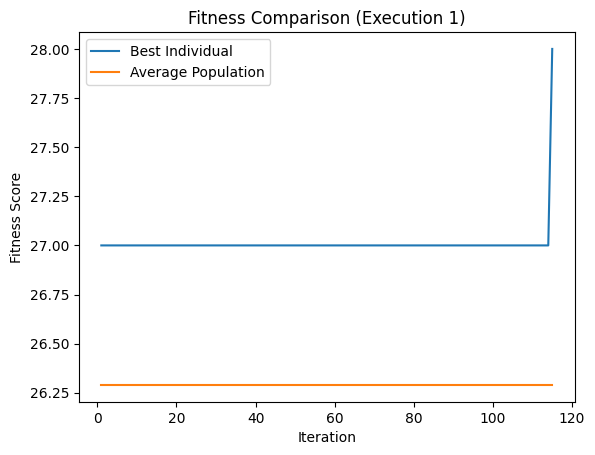

Execution: 2, Best Solution: [4, 2, 5, 8, 6, 1, 3, 7], Fitness Score: 28


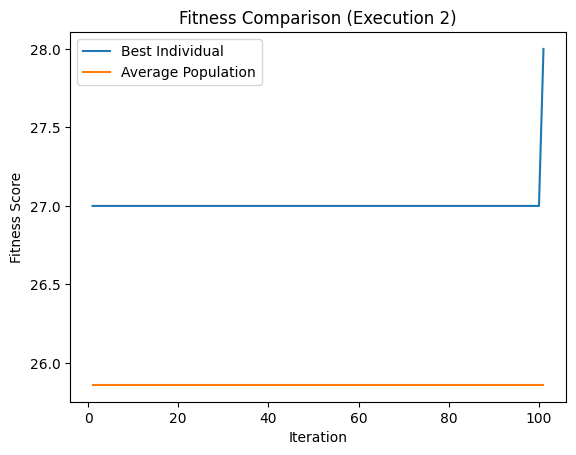

Execution: 3, Best Solution: [3, 5, 7, 1, 4, 2, 8, 6], Fitness Score: 28


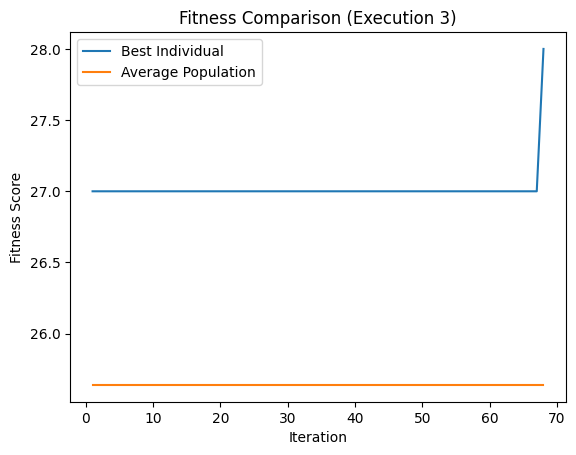

Execution: 4, Best Solution: [5, 2, 8, 1, 4, 7, 3, 6], Fitness Score: 28


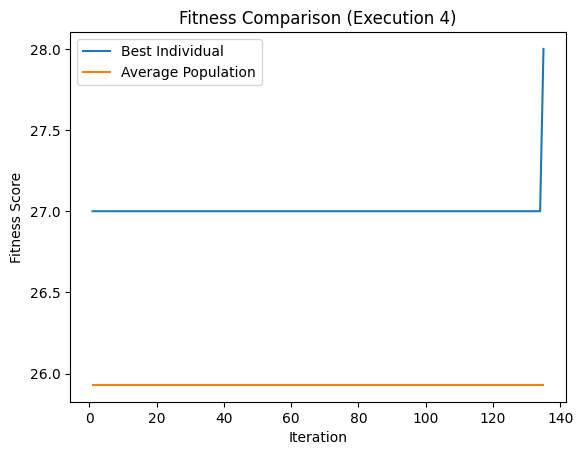

Execution: 5, Best Solution: [5, 7, 1, 4, 2, 8, 6, 3], Fitness Score: 28


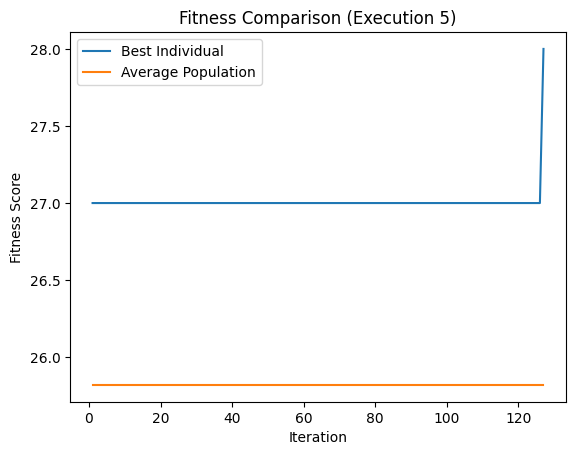

Execution: 6, Best Solution: [7, 2, 4, 1, 8, 5, 3, 6], Fitness Score: 28


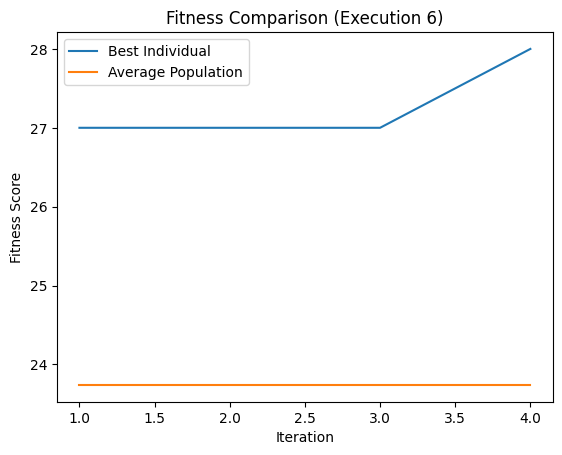

Execution: 7, Best Solution: [8, 4, 1, 3, 6, 2, 7, 5], Fitness Score: 28


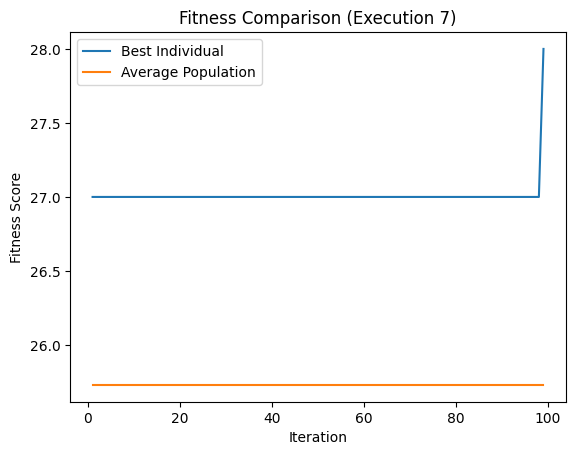

Execution: 8, Best Solution: [6, 3, 7, 2, 8, 5, 1, 4], Fitness Score: 28


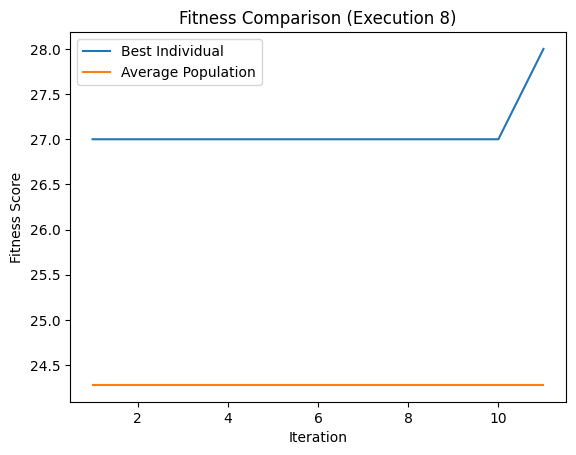

Execution: 9, Best Solution: [1, 6, 8, 3, 7, 4, 2, 5], Fitness Score: 28


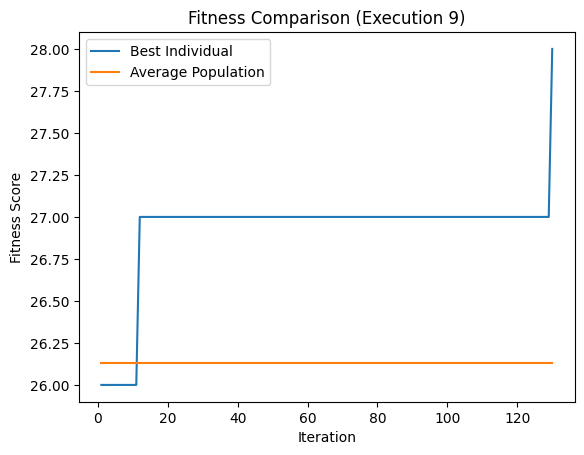

Execution: 10, Best Solution: [5, 7, 1, 4, 2, 8, 6, 3], Fitness Score: 28


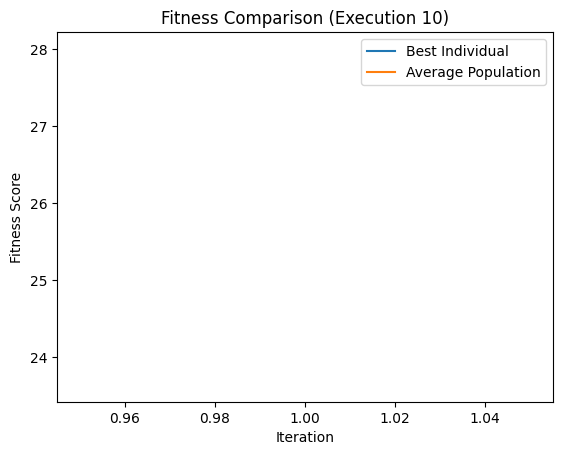

Execution: 11, Best Solution: [3, 6, 8, 1, 5, 7, 2, 4], Fitness Score: 28


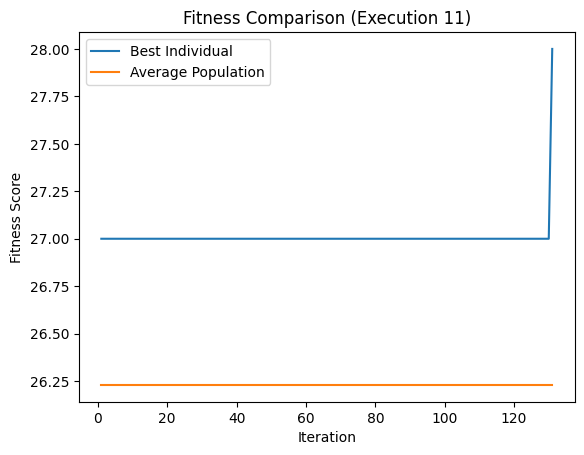

Execution: 12, Best Solution: [4, 2, 7, 3, 6, 8, 5, 1], Fitness Score: 28


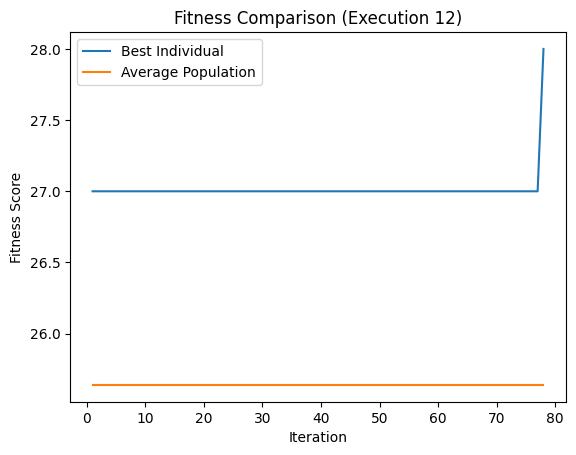

Execution: 13, Best Solution: [7, 4, 2, 8, 6, 1, 3, 5], Fitness Score: 28


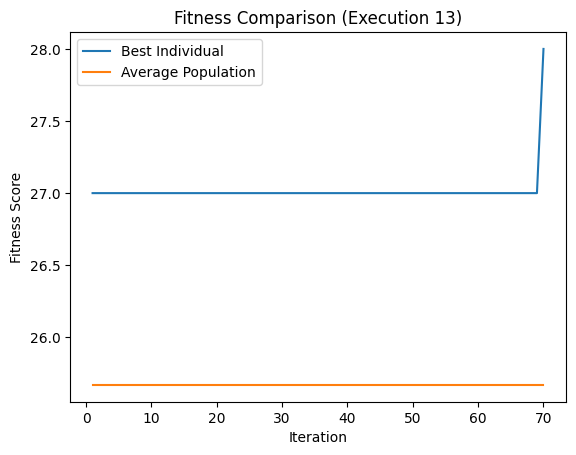

Execution: 14, Best Solution: [5, 2, 6, 1, 7, 4, 8, 3], Fitness Score: 28


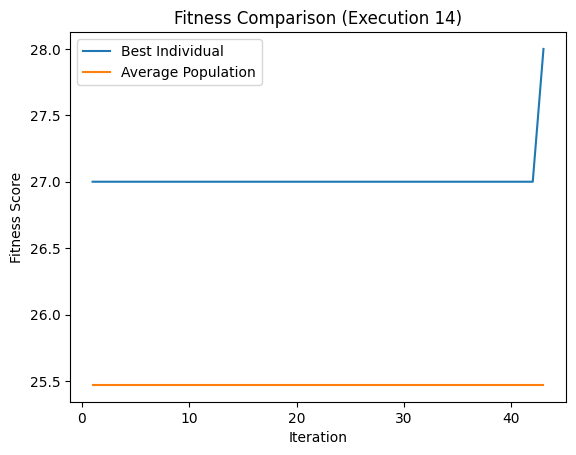

Execution: 15, Best Solution: [7, 3, 8, 2, 5, 1, 6, 4], Fitness Score: 28


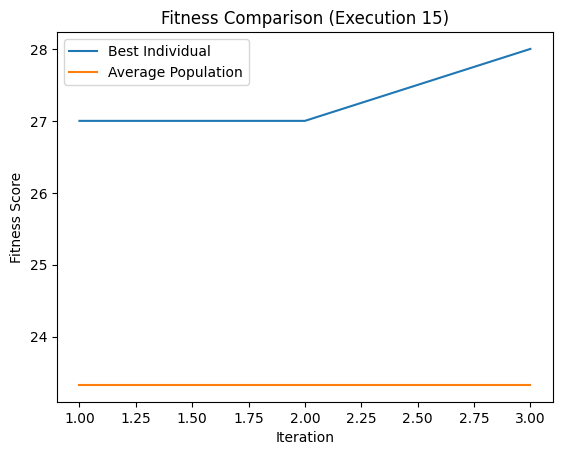

Execution: 16, Best Solution: [6, 8, 2, 4, 1, 7, 5, 3], Fitness Score: 28


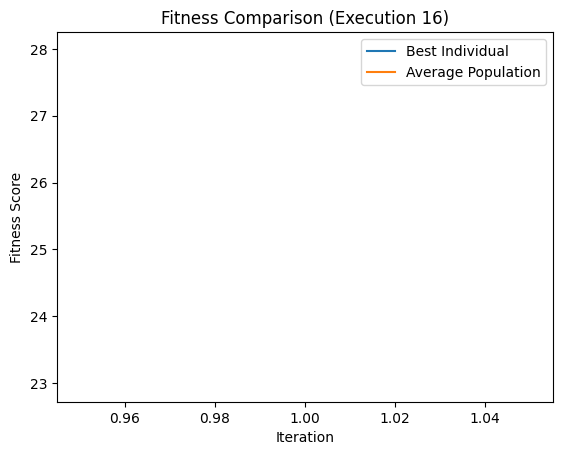

Execution: 17, Best Solution: [4, 1, 5, 8, 6, 3, 7, 2], Fitness Score: 28


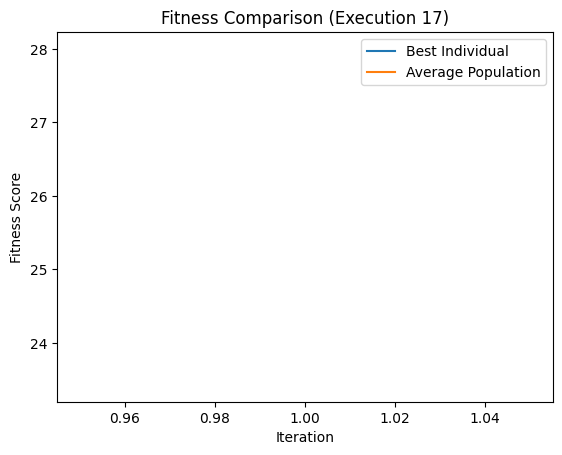

Execution: 18, Best Solution: [4, 8, 1, 3, 6, 2, 7, 5], Fitness Score: 28


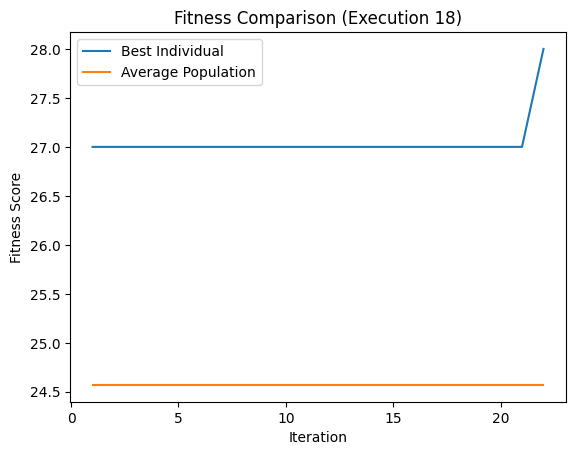

Execution: 19, Best Solution: [5, 7, 4, 1, 3, 8, 6, 2], Fitness Score: 28


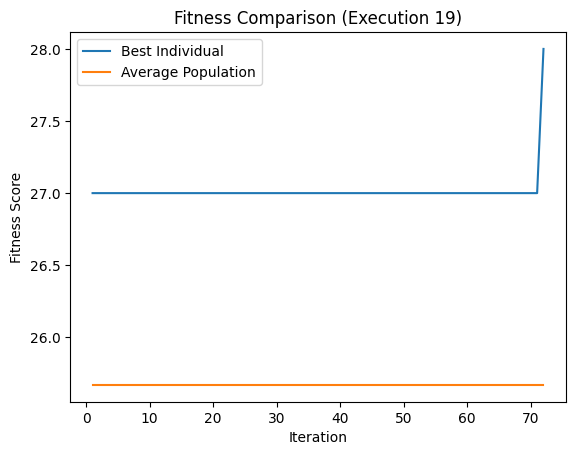

Execution: 20, Best Solution: [3, 6, 8, 1, 5, 7, 2, 4], Fitness Score: 28


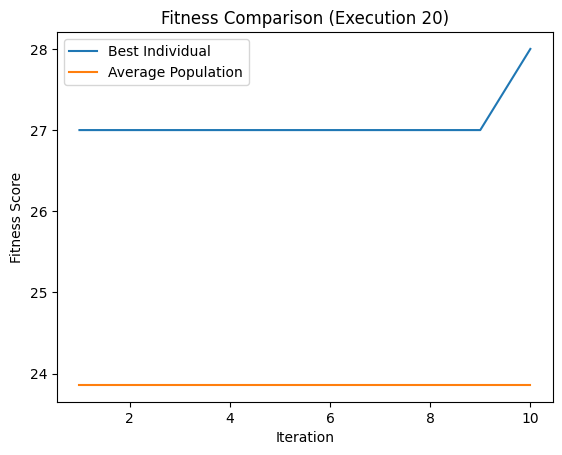

Execution: 21, Best Solution: [3, 7, 2, 8, 6, 4, 1, 5], Fitness Score: 28


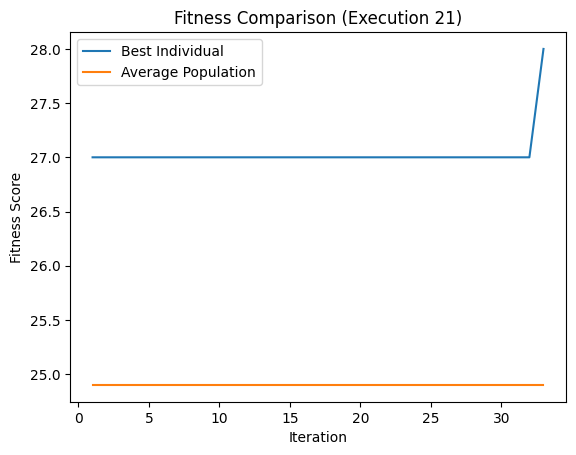

Execution: 22, Best Solution: [5, 3, 1, 6, 8, 2, 4, 7], Fitness Score: 28


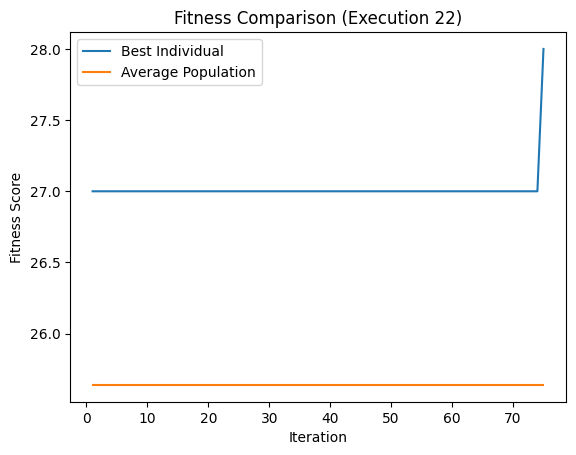

Execution: 23, Best Solution: [6, 2, 7, 1, 3, 5, 8, 4], Fitness Score: 28


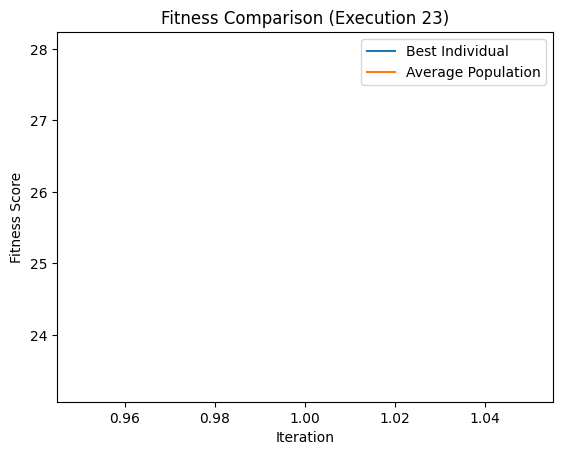

Execution: 24, Best Solution: [3, 8, 4, 7, 1, 6, 2, 5], Fitness Score: 28


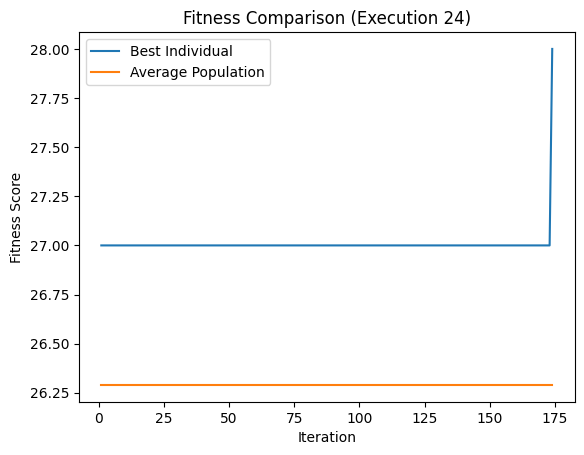

Execution: 25, Best Solution: [4, 2, 8, 6, 1, 3, 5, 7], Fitness Score: 28


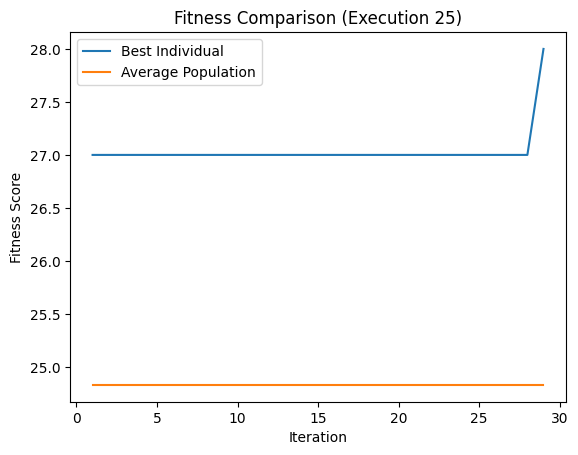

Execution: 26, Best Solution: [8, 3, 1, 6, 2, 5, 7, 4], Fitness Score: 28


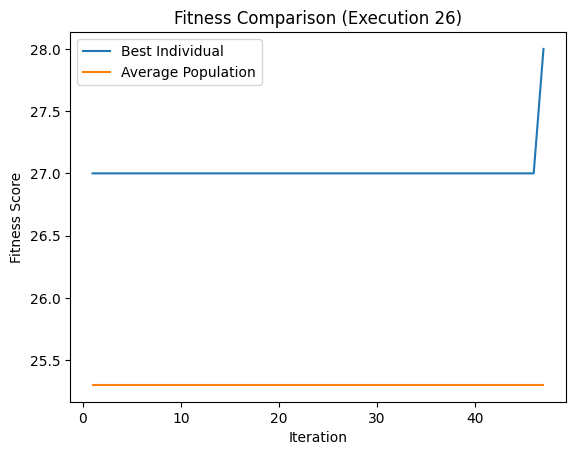

Execution: 27, Best Solution: [6, 4, 7, 1, 3, 5, 2, 8], Fitness Score: 28


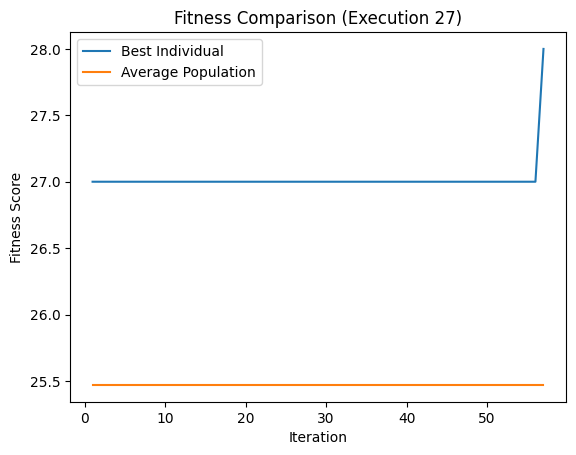

Execution: 28, Best Solution: [5, 7, 2, 6, 3, 1, 8, 4], Fitness Score: 28


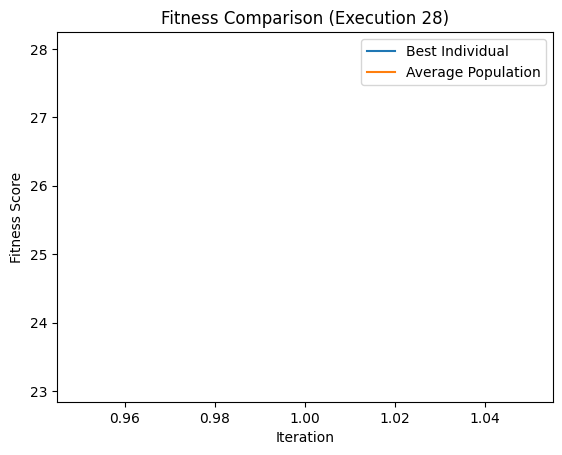

Execution: 29, Best Solution: [4, 7, 3, 8, 2, 5, 1, 6], Fitness Score: 28


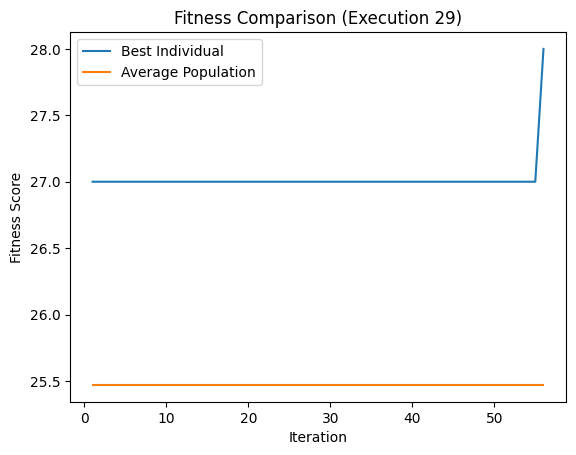

Execution: 30, Best Solution: [5, 7, 2, 4, 8, 1, 3, 6], Fitness Score: 28


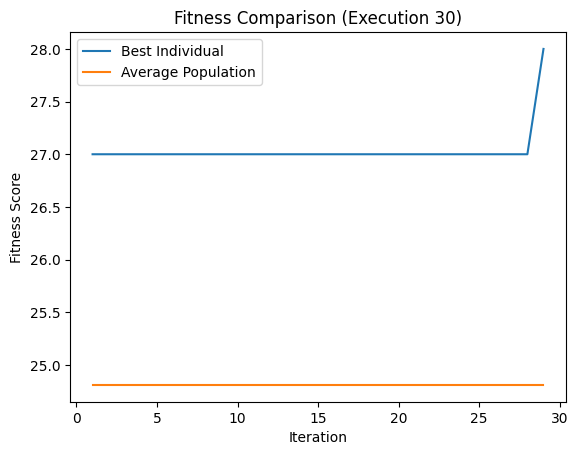

Average Convergence Iterations per Execution: 57.47


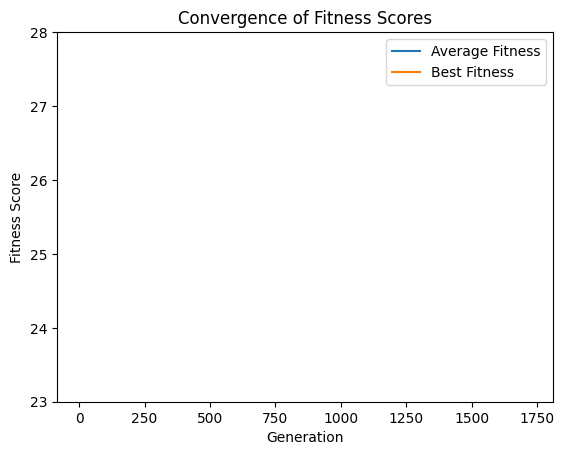

Convergence Analysis:
  - Converged Executions: 30/30 (100.00%)
  - Average Convergence Iteration: 57.47
  - Standard Deviation of Convergence Iteration: 49.40
  - Average Number of Converged Individuals: 1.00
Fitness Analysis:
  - Average Fitness Scores: 28.00
  - Standard Deviation of Fitness Scores: 0.00


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

POPULATION_SIZE = 100
NUM_CHILDREN = 2
NUM_QUEENS = 8
MAX_EVALUATIONS = 10000
NUM_EXECUTIONS = 30

def initialize_population():
    population = []
    for _ in range(POPULATION_SIZE):
        individual = random.sample(range(1, NUM_QUEENS + 1), NUM_QUEENS)
        population.append(individual)
    return population

def fitness_score(individual):
    score = 0
    for i in range(NUM_QUEENS):
        for j in range(i + 1, NUM_QUEENS):
            if individual[i] == individual[j] or abs(individual[i] - individual[j]) == abs(i - j):
                score += 1
    return (NUM_QUEENS * (NUM_QUEENS - 1)) // 2 - score

def selection(population):
    fitness_scores = [fitness_score(individual) for individual in population]
    total_fitness = sum(fitness_scores)
    probabilities = [fitness / total_fitness for fitness in fitness_scores]
    selected = random.choices(population, probabilities, k=2)
    return selected

def crossover(parent1, parent2):
    child1 = parent1.copy()
    child2 = parent2.copy()
    start = random.randint(0, NUM_QUEENS - 2)
    end = random.randint(start + 1, NUM_QUEENS - 1)

    mapping1 = {}
    mapping2 = {}

    for i in range(start, end + 1):
        mapping1[parent2[i]] = parent1[i]
        mapping2[parent1[i]] = parent2[i]

        child1[i] = parent2[i]
        child2[i] = parent1[i]

    for i in range(NUM_QUEENS):
        if start <= i <= end:
            continue
        while child1[i] in mapping1:
            child1[i] = mapping1[child1[i]]
        while child2[i] in mapping2:
            child2[i] = mapping2[child2[i]]

    return child1, child2

def mutation(individual):
    mutated_individual = individual.copy()
    pos1 = random.randint(0, NUM_QUEENS - 1)
    pos2 = random.randint(0, NUM_QUEENS - 1)
    mutated_individual[pos1], mutated_individual[pos2] = mutated_individual[pos2], mutated_individual[pos1]
    return mutated_individual

def evaluate_population(population):
    evaluations = 0
    for individual in population:
        score = fitness_score(individual)
        evaluations += 1
        if score == (NUM_QUEENS * (NUM_QUEENS - 1)) // 2:
            return True, evaluations
        if evaluations >= MAX_EVALUATIONS:
            return False, evaluations
    return False, evaluations

def genetic_algorithm():
    best_scores = []
    convergence_iteration = []
    num_converged_individuals = []
    fitness_scores = []
    converged_executions = 0
    convergence_iterations_per_execution = []
    avg_population_fitness_per_execution = []

    for execution_number in range(1, NUM_EXECUTIONS + 1):
        population = initialize_population()
        evaluations = 0
        generation = 1
        converged = False
        converged_iteration = 0
        converged_individuals = 0
        best_fitness = 0
        iteration_fitness = []
        best_individual_fitness_per_iteration = []

        while True:
            parents = selection(population)
            children = []
            for _ in range(NUM_CHILDREN):
                child1, child2 = crossover(parents[0], parents[1])
                child1 = mutation(child1)
                child2 = mutation(child2)
                children.extend([child1, child2])
            population.extend(children)
            population = sorted(population, key=lambda ind: fitness_score(ind), reverse=True)[:POPULATION_SIZE]
            evaluations += NUM_CHILDREN

            if not converged:
                best_fitness = fitness_score(population[0])
                iteration_fitness.append(best_fitness)
                best_individual_fitness_per_iteration.append(best_fitness)
                if best_fitness == (NUM_QUEENS * (NUM_QUEENS - 1)) // 2:
                    converged = True
                    converged_iteration = generation
                    converged_individuals = sum([1 for ind in population if fitness_score(ind) == best_fitness])

            if converged or evaluations >= MAX_EVALUATIONS:
                break

            generation += 1

        best_scores.append(best_fitness)
        convergence_iteration.append(converged_iteration)
        num_converged_individuals.append(converged_individuals)
        fitness_scores.append(iteration_fitness)
        convergence_iterations_per_execution.append(converged_iteration)  # Armazena o número de iterações de convergência

        population_fitness = [fitness_score(individual) for individual in population]
        avg_population_fitness = np.mean(population_fitness)
        avg_population_fitness_per_execution.append(avg_population_fitness)  # Armazena o fitness médio da população

        best_individual = population[0]
        best_individual_fitness = fitness_score(best_individual)

        # Exibir a melhor solução e seu fitness score
        print("Execution: {}, Best Solution: {}, Fitness Score: {}".format(execution_number, best_individual, best_individual_fitness))

        if converged:
            converged_executions += 1
            # Plotting the best individual fitness per iteration for the current execution
            iterations = range(1, len(best_individual_fitness_per_iteration) + 1)
            plt.plot(iterations, best_individual_fitness_per_iteration, label='Best Individual')
            plt.plot(iterations, [avg_population_fitness] * len(iterations), label='Average Population')
            plt.xlabel('Iteration')
            plt.ylabel('Fitness Score')
            plt.title('Fitness Comparison (Execution {})'.format(execution_number))
            plt.legend()
            plt.show()
            continue

        # Plotting the best individual fitness per iteration for the current execution
        iterations = range(1, len(best_individual_fitness_per_iteration) + 1)
        plt.plot(iterations, best_individual_fitness_per_iteration, label='Best Individual')
        plt.plot(iterations, [avg_population_fitness] * len(iterations), label='Average Population')
        plt.xlabel('Iteration')
        plt.ylabel('Fitness Score')
        plt.title('Fitness Comparison (Execution {})'.format(execution_number))
        plt.legend()
        plt.show()

    # Calcular e exibir o número médio de iterações de convergência por execução
    avg_convergence_iterations = np.mean(convergence_iterations_per_execution)
    print("Average Convergence Iterations per Execution: {:.2f}".format(avg_convergence_iterations))

    # Plotting the convergence of best individual fitness
    avg_fitness = np.mean(fitness_scores, axis=0)
    best_fitness = np.max(fitness_scores, axis=0)
    plt.plot(range(1, len(avg_fitness) + 1), avg_fitness, label='Average Fitness')
    plt.plot(range(1, len(best_fitness) + 1), best_fitness, label='Best Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness Score')
    plt.title('Convergence of Fitness Scores')
    plt.legend()
    plt.ylim(23, 28)
    plt.show()

    # Analysis of convergence metrics
    convergence_percentage = converged_executions / NUM_EXECUTIONS * 100
    avg_convergence_iteration = np.mean(convergence_iteration)
    std_convergence_iteration = np.std(convergence_iteration)
    avg_num_converged_individuals = np.mean(num_converged_individuals)
    avg_fitness_scores = np.mean(best_scores)
    std_fitness_scores = np.std(best_scores)

    print("Convergence Analysis:")
    print("  - Converged Executions: {}/{} ({:.2f}%)".format(converged_executions, NUM_EXECUTIONS, convergence_percentage))
    print("  - Average Convergence Iteration: {:.2f}".format(avg_convergence_iteration))
    print("  - Standard Deviation of Convergence Iteration: {:.2f}".format(std_convergence_iteration))
    print("  - Average Number of Converged Individuals: {:.2f}".format(avg_num_converged_individuals))
    print("Fitness Analysis:")
    print("  - Average Fitness Scores: {:.2f}".format(avg_fitness_scores))
    print("  - Standard Deviation of Fitness Scores: {:.2f}".format(std_fitness_scores))

genetic_algorithm()
